In [1]:
import pandas as pd
from osgeo import gdal
from tqdm import tqdm
import numpy as np

import utils 
gdal.UseExceptions()

In [2]:
COLLECTION = 'SMAP_soil_moisture'
REPO_PATH = input('Enter path to repo: ')

Enter path to repo: /Users/gracemitchell/omdena-wri


In [3]:
# run to copy images and metadata to repo_path/analysis/metadata[images_tif]
# utils.data_to_local(COLLECTION)

In [4]:
countries_platforms = utils.country_platform_info(REPO_PATH)
countries = utils.countries_with_data(COLLECTION)

In [5]:
# load in metadata --> df of image_id, ts, mean value in Celcius
def process_images(country, collection):
    metadata = pd.read_csv(F'./metadata/{collection}/{country}.csv')
    ssms = []
    susms = []
    for i, row in metadata.iterrows():
        image_id = row['image_id']
        image_fp = F'./images_tif/{collection}/{country}/{image_id.replace("/", "-")}.tif' 
        img = gdal.Open(image_fp).ReadAsArray()
        # look at bands 1 and 2 (ssm, susm in mm)
        # ssm = surface soil moisture, drop nans
        ssm = img[0,:,:]
        avg_ssm = np.mean(ssm[np.isfinite(ssm)])
        # susm = subsurface soil moisture
        susm = img[1,:,:]
        avg_susm = np.mean(susm[np.isfinite(susm)])
        ssms.append(avg_ssm)
        susms.append(avg_susm)

    metadata['avg_ssm_mm'] = ssms
    metadata['avg_susm_mm'] = susms
    metadata = metadata[['alpha3code', 'image_timestamp', 'avg_ssm_mm', 'avg_susm_mm']]
    metadata['image_timestamp'] = pd.to_datetime(metadata['image_timestamp'], infer_datetime_format=True)
    metadata['month'] = metadata['image_timestamp'].apply(lambda x: x.month)
    metadata['year'] = metadata['image_timestamp'].apply(lambda x: x.year)
    return metadata

def all_mean_ssm_susm(countries, countries_platforms, collection):
    dfs = []
    for country in tqdm(countries, total=len(countries), desc='Getting mean ssm and susm...'):
        df = process_images(country, collection)
        dfs.append(df)
    df = pd.concat(dfs)
    # merge on info
    df = df.merge(countries_platforms, how='left', on=['alpha3code'])
    df.to_csv(F'./output/{collection}_by_country.csv', index=False)


In [6]:
# all_mean_ssm_susm(countries, countries_platforms, COLLECTION)

In [7]:
def platform_annual_mean_ssm_susm(collection):
    df1 = pd.read_csv(F'./output/{collection}_by_country.csv')
    df2 = df1.groupby(['platform', 'year'])['avg_ssm_mm'].mean().reset_index()
    df3 = df1.groupby(['platform', 'year'])['avg_susm_mm'].mean().reset_index()
    return df1, df2, df3

ssm_susm_by_country, ssm_by_platform, susm_by_platform = platform_annual_mean_ssm_susm(COLLECTION)

afr100: 30 countries in sample
cities4forests: 18 countries in sample
initative20x20: 15 countries in sample


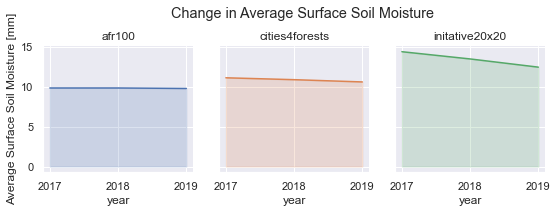

In [8]:
title = 'Average Surface Soil Moisture [mm]'
column_name = 'avg_ssm_mm'
utils.compare_platforms_area_curve(ssm_susm_by_country, ssm_by_platform, column_name, title)

afr100: 30 countries in sample
cities4forests: 18 countries in sample
initative20x20: 15 countries in sample


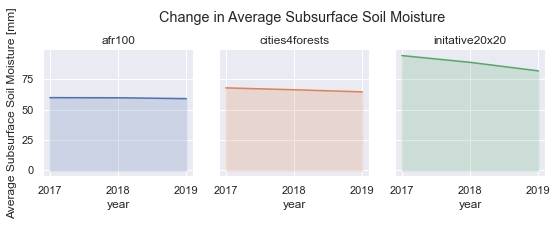

In [9]:
title = 'Average Subsurface Soil Moisture [mm]'
column_name = 'avg_susm_mm'
utils.compare_platforms_area_curve(ssm_susm_by_country, susm_by_platform, column_name, title)

In [10]:
palette = 'YlOrRd'
title = 'Average Surface Soil Moisture Change [mm]'
start_year = 2017
end_year = 2019
title = F'{title} {start_year}-{end_year}'
column_name = F'avg_ssm_mm'

In [11]:
viz_df, min_change, max_change = utils.get_visualization_df(column_name, start_year, end_year, REPO_PATH, ssm_susm_by_country, 'afr100', countries_platforms)
utils.visualize_country_platform_changes(COLLECTION, 'afr100', viz_df, F'{column_name}_{start_year}_{end_year}', min_change, max_change, title, palette)

Loading BokehJS ...

In [12]:
viz_df, min_change, max_change = utils.get_visualization_df(column_name, start_year, end_year, REPO_PATH, ssm_susm_by_country, 'cities4forests', countries_platforms)
utils.visualize_country_platform_changes(COLLECTION, 'cities4forests', viz_df, F'{column_name}_{start_year}_{end_year}', min_change, max_change, title, palette)

Loading BokehJS ...

In [13]:
viz_df, min_change, max_change = utils.get_visualization_df(column_name, start_year, end_year, REPO_PATH, ssm_susm_by_country, 'initative20x20', countries_platforms)
utils.visualize_country_platform_changes(COLLECTION, 'initative20x20', viz_df, F'{column_name}_{start_year}_{end_year}', min_change, max_change, title, palette)

Loading BokehJS ...

In [14]:
palette = 'YlOrRd'
title = 'Average Subsurface Soil Moisture Change [mm]'
start_year = 2017
end_year = 2019
title = F'{title} {start_year}-{end_year}'
column_name = F'avg_susm_mm'

In [15]:
viz_df, min_change, max_change = utils.get_visualization_df(column_name, start_year, end_year, REPO_PATH, ssm_susm_by_country, 'afr100', countries_platforms)
utils.visualize_country_platform_changes(COLLECTION, 'afr100', viz_df, F'{column_name}_{start_year}_{end_year}', min_change, max_change, title, palette)

Loading BokehJS ...

In [16]:
viz_df, min_change, max_change = utils.get_visualization_df(column_name, start_year, end_year, REPO_PATH, ssm_susm_by_country, 'cities4forests', countries_platforms)
utils.visualize_country_platform_changes(COLLECTION, 'cities4forests', viz_df, F'{column_name}_{start_year}_{end_year}', min_change, max_change, title, palette)

Loading BokehJS ...

In [17]:
viz_df, min_change, max_change = utils.get_visualization_df(column_name, start_year, end_year, REPO_PATH, ssm_susm_by_country, 'initative20x20', countries_platforms)
utils.visualize_country_platform_changes(COLLECTION, 'initative20x20', viz_df, F'{column_name}_{start_year}_{end_year}', min_change, max_change, title, palette)

Loading BokehJS ...